In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2020-07.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.988752,6.964027,50.988954,6.964389,2020-07-02 11:33:01,2020-07-02 11:39:01,6.0,34.0,31431531,31877143,2133.0,NaN,BIKE 21808,1093
1,50.988954,6.964389,50.988585,6.963544,2020-07-02 22:59:01,2020-07-02 23:04:02,5.0,72.0,31877143,31912654,680.0,NaN,BIKE 21808,1157
2,50.988585,6.963544,50.989189,6.965672,2020-07-03 12:37:02,2020-07-03 12:41:02,4.0,163.0,31912654,31931440,813.0,NaN,BIKE 21808,1121
3,50.961752,6.899404,50.964308,6.899700,2020-07-01 18:17:03,2020-07-01 22:21:01,244.0,285.0,31754415,31859162,1097.0,NaN,BIKE 21133,1093
4,50.964308,6.899700,50.969006,6.892875,2020-07-02 09:12:02,2020-07-02 09:31:02,19.0,708.0,31859162,31872683,651.0,NaN,BIKE 21133,1117


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

68288

In [14]:
len(out_distances_total)

8637

In [15]:
len(out_rides)

8569

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

12355

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

4851

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

10.0       66
16.0       60
11.0       56
9.0        56
14.0       56
15.0       56
13.0       48
23.0       47
7.0        46
19.0       46
18.0       45
20.0       44
17.0       42
28.0       42
8.0        42
12.0       42
5.0        42
25.0       41
30.0       38
31.0       36
32.0       36
6.0        36
916.0      36
828.0      35
21.0       35
4.0        35
606.0      35
22.0       34
24.0       34
33.0       34
           ..
7065.0      1
5757.0      1
5291.0      1
5782.0      1
4884.0      1
5344.0      1
5981.0      1
5260.0      1
6554.0      1
9450.0      1
8897.0      1
10080.0     1
7365.0      1
5909.0      1
14946.0     1
6194.0      1
4968.0      1
6185.0      1
4585.0      1
9453.0      1
6410.0      1
4420.0      1
5768.0      1
7855.0      1
5446.0      1
7886.0      1
6188.0      1
6346.0      1
7769.0      1
5623.0      1
Name: distance, Length: 6692, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

3786

In [23]:
len(out_distances + out_rides)

12355

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

18.092490627928772


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55933 entries, 0 to 55932
Data columns (total 15 columns):
index                   55933 non-null int64
lat_begin               55933 non-null float64
lng_begin               55933 non-null float64
lat_end                 55933 non-null float64
lng_end                 55933 non-null float64
ride_begin              55933 non-null object
ride_end                55933 non-null object
ride_time               55933 non-null float64
distance                55933 non-null float64
uid_begin               55933 non-null int64
uid_end                 55933 non-null int64
standing_before_ride    55933 non-null float64
address                 265 non-null object
name                    55933 non-null object
available_bikes         55933 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 6.4+ MB


In [27]:
df_c['distance'].value_counts()

916.0     36
828.0     35
606.0     35
493.0     34
1057.0    34
954.0     33
826.0     32
670.0     32
694.0     32
474.0     32
751.0     31
567.0     31
587.0     31
877.0     31
632.0     31
882.0     30
624.0     30
883.0     30
508.0     30
870.0     30
568.0     30
783.0     30
813.0     30
857.0     30
763.0     29
688.0     29
897.0     29
1505.0    29
1061.0    29
896.0     29
          ..
4696.0     1
7578.0     1
9292.0     1
5781.0     1
6330.0     1
7775.0     1
5362.0     1
4064.0     1
5807.0     1
8135.0     1
6734.0     1
5603.0     1
9140.0     1
5920.0     1
5261.0     1
5322.0     1
3115.0     1
5047.0     1
5604.0     1
7003.0     1
6062.0     1
6142.0     1
6910.0     1
6468.0     1
6010.0     1
8942.0     1
7023.0     1
6875.0     1
7218.0     1
6656.0     1
Name: distance, Length: 6469, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

9.0      1984
8.0      1976
11.0     1961
10.0     1937
12.0     1904
13.0     1836
14.0     1730
15.0     1703
7.0      1653
17.0     1652
16.0     1603
18.0     1570
19.0     1525
20.0     1511
21.0     1379
6.0      1329
22.0     1321
23.0     1251
24.0     1132
25.0     1104
26.0     1027
27.0      945
28.0      915
29.0      846
5.0       777
30.0      769
31.0      740
32.0      645
33.0      592
34.0      564
         ... 
685.0       1
543.0       1
428.0       1
486.0       1
602.0       1
683.0       1
573.0       1
360.0       1
501.0       1
675.0       1
542.0       1
439.0       1
694.0       1
570.0       1
661.0       1
572.0       1
447.0       1
582.0       1
659.0       1
476.0       1
437.0       1
699.0       1
606.0       1
502.0       1
432.0       1
546.0       1
417.0       1
334.0       1
689.0       1
596.0       1
Name: ride_time, Length: 658, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[0,
 36,
 140,
 155,
 229,
 351,
 392,
 506,
 571,
 573,
 780,
 785,
 794,
 801,
 813,
 826,
 828,
 928,
 1053,
 1083,
 1094,
 1135,
 1177,
 1221,
 1341,
 1349,
 1420,
 1421,
 1455,
 1459,
 1483,
 1490,
 1571,
 1587,
 1628,
 1635,
 1653,
 1656,
 1709,
 1760,
 1774,
 1828,
 1837,
 1844,
 1864,
 1949,
 1979,
 1994,
 2025,
 2075,
 2090,
 2093,
 2179,
 2228,
 2386,
 2395,
 2407,
 2435,
 2491,
 2492,
 2524,
 2561,
 2641,
 2704,
 2768,
 2785,
 2811,
 2827,
 2832,
 2851,
 2869,
 2890,
 2943,
 2966,
 3012,
 3100,
 3113,
 3251,
 3274,
 3306,
 3316,
 3363,
 3367,
 3385,
 3400,
 3437,
 3438,
 3445,
 3484,
 3486,
 3519,
 3548,
 3586,
 3677,
 3738,
 3797,
 3942,
 3943,
 3985,
 4026,
 4040,
 4068,
 4114,
 4128,
 4143,
 4153,
 4154,
 4208,
 4209,
 4237,
 4307,
 4396,
 4424,
 4457,
 4562,
 4605,
 4628,
 4629,
 4653,
 4724,
 4726,
 4772,
 4807,
 4864,
 4890,
 4891,
 4904,
 4931,
 4932,
 4948,
 5013,
 5063,
 5108,
 5153,
 5227,
 5297,
 5336,
 5386,
 5421,
 5476,
 5493,
 5622,
 5625,
 5689,
 5772,
 5773,

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,3,50.961752,6.899404,50.964308,6.899700,2020-07-01 18:17:03,2020-07-01 22:21:01,244.0,285.0,31754415,31859162,1097.0,NaN,BIKE 21133,1093
36,43,50.934858,6.869082,50.937152,6.871163,2020-07-11 17:09:02,2020-07-11 17:16:02,7.0,294.0,32344979,32348727,68.0,NaN,BIKE 21133,1060
140,159,50.915306,6.904107,50.914801,6.907150,2020-07-05 16:44:02,2020-07-05 17:54:01,70.0,221.0,32043913,32056511,176.0,NaN,BIKE 21751,1139
155,176,50.924077,6.927103,50.926229,6.926151,2020-07-28 21:59:02,2020-07-28 22:04:02,5.0,249.0,33314050,33315028,14.0,NaN,BIKE 21751,1055
229,262,50.915443,6.923617,50.914936,6.920365,2020-07-25 18:39:02,2020-07-25 20:10:03,91.0,235.0,33136879,33144705,29.0,NaN,BIKE 21192,1060
351,394,50.910531,6.970805,50.908740,6.972772,2020-07-24 16:34:03,2020-07-24 16:43:03,9.0,242.0,33068603,33073438,67.0,NaN,BIKE 21076,1068
392,438,50.936756,6.951037,50.934829,6.949312,2020-07-07 13:27:02,2020-07-07 13:34:01,7.0,246.0,32139130,32140350,12.0,NaN,BIKE 21415,1095
506,565,50.938067,6.905918,50.938489,6.909058,2020-07-13 15:23:03,2020-07-13 15:31:03,8.0,225.0,32443933,32444424,1.0,NaN,BIKE 21260,1035
571,638,50.923513,6.943520,50.925499,6.942108,2020-07-03 16:22:02,2020-07-03 18:40:02,138.0,242.0,31937672,31951048,88.0,NaN,BIKE 21446,1146
573,641,50.899823,6.947460,50.898623,6.950970,2020-07-04 00:19:02,2020-07-04 00:39:03,20.0,280.0,31970271,31971439,27.0,NaN,BIKE 21446,1105


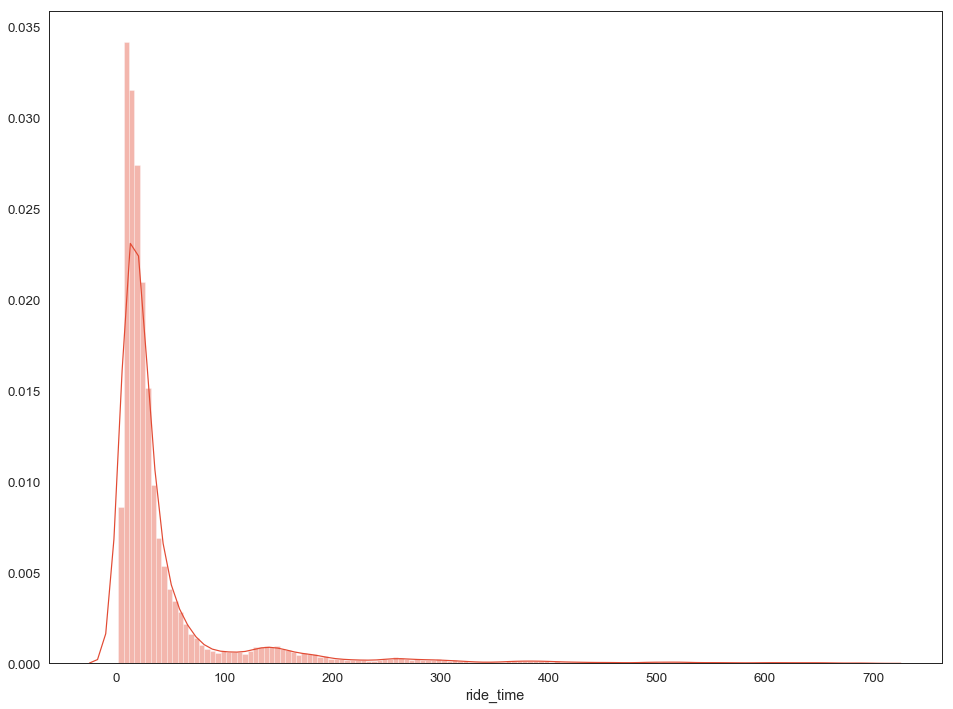

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

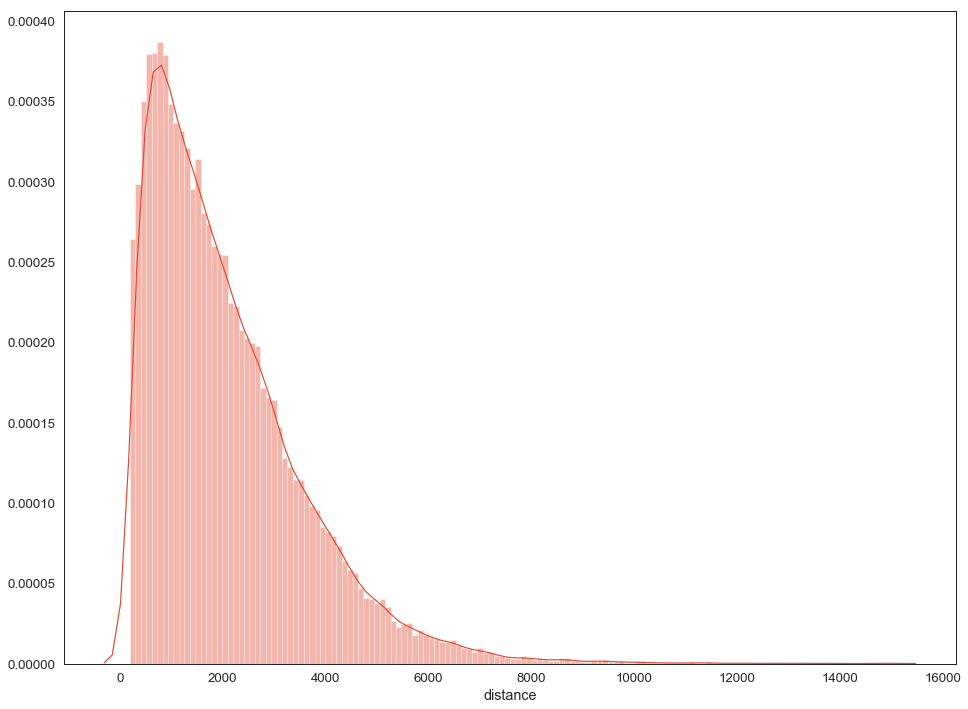

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
231,265,50.927380,6.911370,50.972653,6.976079,2020-07-27 04:29:03,2020-07-27 04:56:02,27.0,6776.0,33168288,33207611,203.0,Ulandstraße 12,BIKE 21192,1070
276,312,50.932531,6.996588,50.929334,6.998448,2020-07-04 02:39:02,2020-07-04 02:46:02,7.0,379.0,31970260,31975793,7.0,Köln - Taunusstr. 26,BIKE 21076,1112
280,318,50.971286,7.007618,50.941914,6.973468,2020-07-09 12:06:02,2020-07-09 12:25:02,19.0,4049.0,32138744,32230978,2832.0,"Schützenhofstraße 15, Köln",BIKE 21076,1096
385,431,50.936414,6.938906,50.924122,6.958681,2020-07-05 15:35:02,2020-07-05 15:57:01,22.0,1947.0,32048131,32050231,19.0,Rudolfplatz,BIKE 21415,1134
395,443,50.930459,6.944157,50.890968,7.006029,2020-07-09 17:42:02,2020-07-09 18:12:02,30.0,6174.0,32202436,32248757,10.0,weiherstraße,BIKE 21415,1050
1443,1689,50.958142,6.934683,50.958610,6.941007,2020-07-16 15:57:03,2020-07-16 16:03:02,6.0,446.0,32593414,32621166,364.0,Methweg 18,BIKE 21909,1009
1565,1827,50.941027,6.935277,50.957425,6.935352,2020-07-22 23:13:02,2020-07-22 23:45:02,32.0,1824.0,32968906,32979572,11.0,Köln - Venloerstr. 25-27,BIKE 22482,1018
1692,1967,50.923048,6.966877,50.930832,6.965270,2020-07-11 15:15:02,2020-07-11 15:25:01,10.0,873.0,32302071,32343202,1258.0,Köln - Anna-Schneider-Steig 22,BIKE 21856,1040
1751,2034,50.942133,6.957717,50.923795,6.926374,2020-07-23 17:43:03,2020-07-23 18:27:03,44.0,2998.0,33017239,33020718,10.0,Köln Hauptbahnhof,BIKE 21856,1064
2085,2408,50.940569,6.939968,50.962012,6.890852,2020-07-31 15:24:03,2020-07-31 15:52:02,28.0,4187.0,33454846,33469452,271.0,Friesenplatz,BIKE 21689,1064


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
7383,9175,50.960374,6.939801,50.955517,6.963865,2020-07-16 22:13:02,2020-07-16 22:32:03,19.0,1770.0,32616343,32640955,407.0,NaN,BIKE 22365,1041
7384,9176,50.955517,6.963865,50.960463,6.939858,2020-07-16 23:22:02,2020-07-16 23:38:02,16.0,1770.0,32640955,32643093,50.0,NaN,BIKE 22365,987
8244,10185,50.934921,6.882055,50.947578,6.885587,2020-07-16 20:13:03,2020-07-16 20:31:02,18.0,1429.0,32628107,32635992,132.0,NaN,BIKE 21550,1015
8245,10186,50.947578,6.885587,50.934930,6.882043,2020-07-18 09:52:02,2020-07-18 10:08:03,16.0,1429.0,32635992,32709794,2241.0,NaN,BIKE 21550,1009
9233,11353,50.956141,6.965875,50.951417,6.975376,2020-07-05 14:28:01,2020-07-05 14:53:02,25.0,848.0,32045216,32046963,10.0,NaN,BIKE 22274,1127
9234,11355,50.952529,6.977572,50.955981,6.966777,2020-07-05 15:29:01,2020-07-05 16:56:02,87.0,848.0,32048617,32053428,2.0,NaN,BIKE 22274,1129
11414,14217,50.951029,6.925813,50.954662,6.950235,2020-07-05 19:22:02,2020-07-05 19:32:02,10.0,1758.0,32056374,32062614,90.0,NaN,BIKE 22800,1124
11415,14218,50.954662,6.950235,50.950817,6.925904,2020-07-05 19:37:01,2020-07-05 19:48:02,11.0,1758.0,32062614,32063564,5.0,NaN,BIKE 22800,1119
11417,14221,50.954988,6.950541,50.950623,6.926014,2020-07-05 23:02:02,2020-07-05 23:26:01,24.0,1786.0,32072727,32073253,8.0,NaN,BIKE 22800,1068
11418,14222,50.950623,6.926014,50.954735,6.950651,2020-07-05 23:51:01,2020-07-06 00:07:01,16.0,1786.0,32073253,32074687,25.0,NaN,BIKE 22800,1074


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
6565,8205,50.968845,6.944956,50.954507,6.910090,2020-07-19 13:17:02,2020-07-19 13:19:02,2.0,2917.0,32757382,32773032,727.0,NaN,BIKE 21261,952,1500.0
10041,12580,51.000691,6.852282,50.925476,6.939468,2020-07-06 00:10:02,2020-07-06 00:20:01,10.0,10359.0,32073694,32075006,44.0,Lindenstraße 1,BIKE 21913,1074,6500.0
11152,13925,50.940749,7.012085,50.921259,6.959409,2020-07-22 17:31:02,2020-07-22 17:36:02,5.0,4282.0,32950631,32955598,59.0,NaN,BIKE 22925,1048,4000.0
12514,15544,50.938614,6.847147,50.958639,6.947921,2020-07-19 04:15:03,2020-07-19 04:28:02,13.0,7405.0,32750849,32762142,354.0,Körnerstraße,BIKE 22759,946,6500.0
23083,28159,50.947538,6.913463,50.923251,6.957300,2020-07-12 20:06:02,2020-07-12 20:13:03,7.0,4092.0,32303722,32410869,2968.0,NaN,BIKE 21097,1040,4000.0
36020,43944,50.901149,6.953869,50.982029,6.945416,2020-07-16 01:41:03,2020-07-16 01:53:02,12.0,9016.0,32556039,32586070,606.0,NaN,BIKE 22235,1041,6500.0
39781,48471,50.936308,6.970775,50.932355,6.996647,2020-07-24 14:23:03,2020-07-24 14:26:03,3.0,1866.0,33036268,33065093,977.0,NaN,BIKE 22932,1019,1500.0
42579,52257,50.901337,6.944406,50.970458,6.969320,2020-07-05 01:23:02,2020-07-05 01:33:02,10.0,7884.0,32001026,32029047,524.0,NaN,BIKE 21998,1151,6500.0
43102,52935,50.956113,7.013365,50.970453,6.969307,2020-07-07 16:47:02,2020-07-07 16:50:01,3.0,3474.0,32127891,32150738,553.0,NaN,BIKE 22051,1112,1500.0
43104,52937,50.938361,6.959974,50.983699,6.966871,2020-07-08 18:44:01,2020-07-08 18:47:02,3.0,5066.0,32161648,32205214,1401.0,In der Mainkammer 1,BIKE 22051,1078,1500.0


In [46]:
len(unmatched_distances)

13

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                     55658
Kattenbug 2                                 2
Vogelsanger Str. 4 50672 Köln               2
Clevischer Ring, 121 Köln                   1
Köln - Hermannbeckerstr. 10                 1
Graf-Geßler-Str. 2                          1
Brühlerstraße 295                           1
Neusser Pl. 4 50670 Köln                    1
Köln Am Nordpark, Bushaltestelle            1
Siebachstraße 50                            1
Krebsgasse 5                                1
Bahnhofsvorplatz Köln                       1
Neumarkt 20                                 1
Weyerstr 96                                 1
Clevischer Ring 3, 51065 Köln               1
Goltsteinstraße 17                          1
Herthastraße 41 50969 Köln                  1
Balthasarstraße 89                          1
Berrenrather Straße, Köln                   1
 Arnoldsstraße                              1
Käthe-Paulus Straße 36                      1
Köln-Longerich                    

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-07.csv', sep=';', index=False) 

In [52]:
len(df_c)

55920